# Data Parsing and Visualization for DDoS Simulation Experiment

In [1]:
from pathlib import Path
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import pandas as pd

num_user_pings = 200

## Get the file contents as strings

In [2]:

bot_dir = 'C:/Users/atoro/Documents/ece6400_ddos_sim/bot_results'
user_dir = 'C:/Users/atoro/Documents/ece6400_ddos_sim/user_results'

user_contents = {}
bot_contents = {}

def read_files_from_directory(directory_path, contents_dict):
    """
    Read all files from a directory and store them in a dictionary.
    
    Args:
        directory_path (str): Path to the directory containing files
        
    Returns:
        dict: Dictionary with filenames (without extension) as keys and file contents as values
    """
    # Convert string path to Path object
    dir_path = Path(directory_path)
    
    # Create dictionary with filename (without extension) as key and file contents as value
    # Append files to the existing dictionary
    for file in dir_path.glob('*'):
        if file.is_file():
            contents_dict[file.stem] = file.read_text()
    
read_files_from_directory(bot_dir, bot_contents)
read_files_from_directory(user_dir, user_contents)



In [3]:
with open('User_ping_result_baseline.txt', 'r') as file:
    baseline_contents = {
        'User_ping_result_baseline' : file.read()
    }

baseline_contents

{'User_ping_result_baseline': 'PING 10.0.0.2 (10.0.0.2) 56(84) bytes of data.\n64 bytes from 10.0.0.2: icmp_seq=1 ttl=64 time=0.129 ms\n64 bytes from 10.0.0.2: icmp_seq=2 ttl=64 time=0.086 ms\n64 bytes from 10.0.0.2: icmp_seq=3 ttl=64 time=0.087 ms\n64 bytes from 10.0.0.2: icmp_seq=4 ttl=64 time=0.081 ms\n64 bytes from 10.0.0.2: icmp_seq=5 ttl=64 time=0.079 ms\n64 bytes from 10.0.0.2: icmp_seq=6 ttl=64 time=0.081 ms\n64 bytes from 10.0.0.2: icmp_seq=7 ttl=64 time=0.080 ms\n64 bytes from 10.0.0.2: icmp_seq=8 ttl=64 time=0.081 ms\n64 bytes from 10.0.0.2: icmp_seq=9 ttl=64 time=0.082 ms\n64 bytes from 10.0.0.2: icmp_seq=10 ttl=64 time=0.085 ms\n64 bytes from 10.0.0.2: icmp_seq=11 ttl=64 time=0.084 ms\n64 bytes from 10.0.0.2: icmp_seq=12 ttl=64 time=0.082 ms\n64 bytes from 10.0.0.2: icmp_seq=13 ttl=64 time=0.084 ms\n64 bytes from 10.0.0.2: icmp_seq=14 ttl=64 time=0.086 ms\n64 bytes from 10.0.0.2: icmp_seq=15 ttl=64 time=0.068 ms\n64 bytes from 10.0.0.2: icmp_seq=16 ttl=64 time=0.083 ms\n64

In [4]:
print(user_contents)
print(bot_contents)

{'User_ping_result_0.5KBps_0.25KB': 'PING 10.0.0.2 (10.0.0.2) 56(84) bytes of data.\n64 bytes from 10.0.0.2: icmp_seq=1 ttl=64 time=0.113 ms\n64 bytes from 10.0.0.2: icmp_seq=2 ttl=64 time=0.079 ms\n64 bytes from 10.0.0.2: icmp_seq=3 ttl=64 time=0.068 ms\n64 bytes from 10.0.0.2: icmp_seq=4 ttl=64 time=0.064 ms\n64 bytes from 10.0.0.2: icmp_seq=5 ttl=64 time=0.063 ms\n64 bytes from 10.0.0.2: icmp_seq=6 ttl=64 time=0.061 ms\n64 bytes from 10.0.0.2: icmp_seq=7 ttl=64 time=0.071 ms\n64 bytes from 10.0.0.2: icmp_seq=8 ttl=64 time=0.064 ms\n64 bytes from 10.0.0.2: icmp_seq=9 ttl=64 time=0.096 ms\n64 bytes from 10.0.0.2: icmp_seq=10 ttl=64 time=0.064 ms\n64 bytes from 10.0.0.2: icmp_seq=11 ttl=64 time=0.064 ms\n64 bytes from 10.0.0.2: icmp_seq=12 ttl=64 time=0.071 ms\n64 bytes from 10.0.0.2: icmp_seq=66 ttl=64 time=3580 ms\n64 bytes from 10.0.0.2: icmp_seq=119 ttl=64 time=3837 ms\n64 bytes from 10.0.0.2: icmp_seq=131 ttl=64 time=3647 ms\n64 bytes from 10.0.0.2: icmp_seq=138 ttl=64 time=3803 m

## Functions to get information and data from ping outputs

### Get data from the ping output files

In [5]:
# Parse output for packet loss and rtt
def get_rtt_and_packetloss(output_string):
    ping_info = {}
    
    packets_match = re.search(r'(\d+) packets transmitted, (\d+) received', output_string)
    packet_loss_match = re.search(r'(\d+\.?\d*)% packet loss', output_string)
    rtt_match = re.search(r'rtt min/avg/max/mdev = (\d+\.\d+)/(\d+\.\d+)/(\d+\.\d+)/(\d+\.\d+) ms', output_string)

    if packets_match and packet_loss_match and rtt_match:
        total_packets = int(packets_match.group(1))
        dropped_packets = total_packets - int(packets_match.group(2))
        packet_loss = float(packet_loss_match.group(1))
        rtt_min, rtt_avg, rtt_max, rtt_mdev = map(float, rtt_match.groups())

        # Save into ping info dict
        ping_info = {
            'total_packets': total_packets,
            'dropped_packets': dropped_packets,
            'packet_loss': packet_loss,
            'rtt_min': rtt_min,
            'rtt_avg': rtt_avg,
            'rtt_max': rtt_max
        }
    elif packets_match and packet_loss_match:
        total_packets = int(packets_match.group(1))
        dropped_packets = total_packets - int(packets_match.group(2))
        packet_loss = float(packet_loss_match.group(1))
        ping_info = {
            'total_packets': total_packets,
            'dropped_packets': dropped_packets,
            'packet_loss': packet_loss,
            'rtt_min': None,
            'rtt_avg': None,
            'rtt_max': None
        }
    else:
        ping_info = {
            'total_packets': None,
            'dropped_packets': None,
            'packet_loss': None,
            'rtt_min': None,
            'rtt_avg': None,
            'rtt_max': None
        }
    

    
    return(ping_info)

In [6]:
def get_ping_series(output_contents):
    # Save a time series of each packet being sent
    ping_series = []
    
    # Iterate through each line of the ping output
    lines = output_contents.splitlines()
   
    # Initialize a dictionary to store sequence numbers and their times
    seq_times = {}
    
    for line in lines:
        # Check for successful ping response
        success_match = re.search(r'icmp_seq=(\d+) ttl=\d+ time=(\d+\.?\d*) ms', line)
        if success_match:
            seq_num = int(success_match.group(1))
            rtt = float(success_match.group(2))
            seq_times[seq_num] = rtt
            
        # Check for unreachable response
        unreachable_match = re.search(r'icmp_seq=(\d+) Destination Host Unreachable', line)
        if unreachable_match:
            seq_num = int(unreachable_match.group(1))
            seq_times[seq_num] = -1
    
    # Create the series in order from 1 to max_seq
    for seq in range(1, num_user_pings + 1):
        if seq in seq_times:
            ping_series.append(seq_times[seq])
        else:
            # If sequence number not found, assume it was unreachable
            ping_series.append(-1)
    
    return ping_series

In [7]:
def create_bot_stats_dataframe(bot_info_list):
    """
    Create a pandas DataFrame containing statistics for all bots.
    
    Args:
        bot_info_list (list): List of dictionaries containing bot statistics
        
    Returns:
        pandas.DataFrame: DataFrame containing all bot statistics
    """
    # Create a list of dictionaries for each bot's stats
    stats_list = []
    for bot in bot_info_list:
        stats = {
            'Bot ID': bot['bot_id'],
            'Total Packets': bot['total_packets'],
            'Packet Loss (%)': f"{bot['packet_loss']:.2f}%",
            'Min RTT (ms)': f"{bot['rtt_min']:.2f}",
            'Avg RTT (ms)': f"{bot['rtt_avg']:.2f}",
            'Max RTT (ms)': f"{bot['rtt_max']:.2f}"
        }
        stats_list.append(stats)
    
    # Create DataFrame
    df = pd.DataFrame(stats_list)
    
    # Set Bot ID as the index
    df.set_index('Bot ID', inplace=True)
    
    return df

In [8]:
# get the information on which experiment the bot or user data is from
def parse_experiment_params(name_string):
    # Search for pattern like '1KBps_1KB'
    match = re.search(r'(\d+\.?\d*)KBps_(\d+\.?\d*)KB', name_string)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None


### Summarize bot data across each experiment

In [9]:
# Get the average stats across all 4 bots for each experiment (different KBps and KB)
def get_bot_experiment_stats(bot_data):
    # Group bots by experiment
    experiment_groups = {}
    for bot in bot_data:
        # Get the experiment parameters
        KBps = bot_data[bot]['target_rate']
        KB = bot_data[bot]['target_size']
        # Add to the experiment group
        if KBps is not None and KB is not None:
            experiment_key = f"{KBps}KBps_{KB}KB"
            if experiment_key not in experiment_groups:
                experiment_groups[experiment_key] = []
            experiment_groups[experiment_key].append(bot)
    
    # Calculate averages for each experiment
    print(experiment_groups)
    experiment_stats = {}
    
    for experiment_key, bots in experiment_groups.items():
        num_bots = len(bots)
        # Initialize sums
        dropped_pkts_sum = 0
        pkt_loss_sum = 0
        rtt_min = 99999999
        rtt_avg_sum = 0
        rtt_max = -1
        bots_with_data = num_bots
        
        # Sum up statistics
        for bot in bots:
            dropped_pkts_sum += bot_data[bot]['dropped_packets']
            pkt_loss_sum += bot_data[bot]['packet_loss']

            if bot_data[bot]['rtt_avg'] is None:
                bots_with_data -= 1
            else:
                rtt_avg_sum += bot_data[bot]['rtt_avg']
                if bot_data[bot]['rtt_min'] < rtt_min:
                    rtt_min = bot_data[bot]['rtt_min']
                if bot_data[bot]['rtt_max'] > rtt_max:
                    rtt_max = bot_data[bot]['rtt_max']
        
        # Calculate stats
        experiment_stats[experiment_key] = {
            'num_bots': num_bots,
            'avg_pkts_dropped': dropped_pkts_sum / num_bots,
            'avg_pkt_loss': pkt_loss_sum / num_bots,
            'rtt_min': rtt_min,
            'rtt_avg': rtt_avg_sum / bots_with_data,
            'rtt_max': rtt_max
        }
    
    return experiment_stats
    


### Summarize user-target data across experiment types (all KB across a KBps, all KBps across a KB)

In [10]:
def get_user_experiment_stats(user_data):
    # First, make sure every user has a packet loss stat
    for user in user_data:
        if user_data[user]['packet_loss'] is None:
            # Calculate packet loss from dropped and total packets in ping series
            ping_series = user_data[user]['ping_series']
            total_packets = float(len(ping_series))
            dropped_packets = float(ping_series.count(-1))
            packet_loss = (dropped_packets / total_packets) * 100.0
            user_data[user]['total_packets'] = total_packets
            user_data[user]['dropped_packets'] = dropped_packets
            user_data[user]['packet_loss'] = packet_loss
    
    # Now, group by experiment type
    KBps_groups = {}
    KB_groups = {}
    for user in user_data:
        # Get the experiment parameters
        KBps = user_data[user]['target_rate']
        KB = user_data[user]['target_size']
        if KBps is not None and KB is not None:
            KBps_key = f"{KBps}"
            KB_key = f"{KB}"
            if KBps_key not in KBps_groups:
                KBps_groups[KBps_key] = []
            if KB_key not in KB_groups:
                KB_groups[KB_key] = []
            KBps_groups[KBps_key].append(user)
            KB_groups[KB_key].append(user)
    
    # Save stats for each group
    KBps_stats = {}
    KB_stats = {}

    # Get stats across all KB iterations for each KBps experiment
    for KBps_key, users in KBps_groups.items():
        # Get avg stats
        KBps_stats[KBps_key] = {}
        KBps_stats[KBps_key]['num_users'] = len(users)
        KBps_stats[KBps_key]['avg_pkt_loss'] = sum([user_data[user]['packet_loss'] for user in users]) / len(users)
        # Get series across queue sizes
        KBps_stats[KBps_key]['KB_series'] = []
        KBps_stats[KBps_key]['pkt_loss_series'] = []
        for user in users:
            KBps_stats[KBps_key]['KB_series'].append(user_data[user]['target_size'])
            KBps_stats[KBps_key]['pkt_loss_series'].append(user_data[user]['packet_loss'])
    
    # Get stats across all KBps iterations for each KB experiment
    for KB_key, users in KB_groups.items():
        # Get avg stats
        KB_stats[KB_key] = {}
        KB_stats[KB_key]['num_users'] = len(users)
        KB_stats[KB_key]['avg_pkt_loss'] = sum([user_data[user]['packet_loss'] for user in users]) / len(users)
        # Get series across KBps
        KB_stats[KB_key]['KBps_series'] = []
        KB_stats[KB_key]['pkt_loss_series'] = []
        for user in users:
            KB_stats[KB_key]['KBps_series'].append(user_data[user]['target_rate'])
            KB_stats[KB_key]['pkt_loss_series'].append(user_data[user]['packet_loss'])
    
    return KBps_stats, KB_stats      



### Now get all the info

In [11]:
# Get all summary stats from bots
bot_info = {}
for bot in bot_contents:
    bot_info[bot] = get_rtt_and_packetloss(bot_contents[bot])
    # Search for bot ID in the bot name
    match = re.search(r'Bot_(\d+)', bot)
    bot_info[bot]['bot_id'] = int(match.group(1))
    bot_info[bot]['target_rate'], bot_info[bot]['target_size'] = parse_experiment_params(bot)

# Get summary stats and ping series for user
user_info = {}
for user in user_contents:
    user_info[user] = get_rtt_and_packetloss(user_contents[user])
    user_info[user]['ping_series'] = get_ping_series(user_contents[user])
    user_info[user]['target_rate'], user_info[user]['target_size'] = parse_experiment_params(user)


In [12]:
baseline_info = get_rtt_and_packetloss(baseline_contents['User_ping_result_baseline'])
baseline_info['ping_series'] = get_ping_series(baseline_contents['User_ping_result_baseline'])

baseline_info

{'total_packets': 200,
 'dropped_packets': 0,
 'packet_loss': 0.0,
 'rtt_min': 0.056,
 'rtt_avg': 0.074,
 'rtt_max': 0.139,
 'ping_series': [0.129,
  0.086,
  0.087,
  0.081,
  0.079,
  0.081,
  0.08,
  0.081,
  0.082,
  0.085,
  0.084,
  0.082,
  0.084,
  0.086,
  0.068,
  0.083,
  0.082,
  0.087,
  0.079,
  0.08,
  0.079,
  0.078,
  0.086,
  0.086,
  0.07,
  0.083,
  0.079,
  0.083,
  0.065,
  0.082,
  0.08,
  0.073,
  0.079,
  0.07,
  0.076,
  0.081,
  0.08,
  0.08,
  0.077,
  0.065,
  0.087,
  0.065,
  0.066,
  0.075,
  0.066,
  0.067,
  0.062,
  0.067,
  0.061,
  0.067,
  0.082,
  0.067,
  0.08,
  0.084,
  0.066,
  0.068,
  0.082,
  0.068,
  0.074,
  0.08,
  0.062,
  0.139,
  0.083,
  0.083,
  0.082,
  0.081,
  0.081,
  0.064,
  0.066,
  0.064,
  0.08,
  0.081,
  0.086,
  0.068,
  0.08,
  0.064,
  0.082,
  0.064,
  0.066,
  0.068,
  0.06,
  0.069,
  0.057,
  0.067,
  0.069,
  0.08,
  0.083,
  0.079,
  0.061,
  0.087,
  0.103,
  0.065,
  0.062,
  0.062,
  0.088,
  0.082,
  0.057,
 

### Get data by experiment

In [13]:
bot_experiment_stats = get_bot_experiment_stats(bot_info)
user_rate_experiment_stats, user_size_experiment_stats = get_user_experiment_stats(user_info)

# bot_stats_dfs = {}
# bot_stats_dfs['1KBps_1KB'] = create_bot_stats_dataframe([
#     bot_info['Bot_0_ping_result_1KBps_1KB'],
#     bot_info['Bot_1_ping_result_1KBps_1KB'],
#     bot_info['Bot_2_ping_result_1KBps_1KB'],
#     bot_info['Bot_3_ping_result_1KBps_1KB']
# ])

{'0.5KBps_0.25KB': ['Bot_0_ping_result_0.5KBps_0.25KB', 'Bot_1_ping_result_0.5KBps_0.25KB', 'Bot_2_ping_result_0.5KBps_0.25KB', 'Bot_3_ping_result_0.5KBps_0.25KB'], '0.5KBps_0.5KB': ['Bot_0_ping_result_0.5KBps_0.5KB', 'Bot_1_ping_result_0.5KBps_0.5KB', 'Bot_2_ping_result_0.5KBps_0.5KB', 'Bot_3_ping_result_0.5KBps_0.5KB'], '0.5KBps_1.0KB': ['Bot_0_ping_result_0.5KBps_1.0KB', 'Bot_1_ping_result_0.5KBps_1.0KB', 'Bot_2_ping_result_0.5KBps_1.0KB', 'Bot_3_ping_result_0.5KBps_1.0KB'], '0.5KBps_10.0KB': ['Bot_0_ping_result_0.5KBps_10.0KB', 'Bot_1_ping_result_0.5KBps_10.0KB', 'Bot_2_ping_result_0.5KBps_10.0KB', 'Bot_3_ping_result_0.5KBps_10.0KB'], '0.5KBps_2.0KB': ['Bot_0_ping_result_0.5KBps_2.0KB', 'Bot_1_ping_result_0.5KBps_2.0KB', 'Bot_2_ping_result_0.5KBps_2.0KB', 'Bot_3_ping_result_0.5KBps_2.0KB'], '0.5KBps_3.0KB': ['Bot_0_ping_result_0.5KBps_3.0KB', 'Bot_1_ping_result_0.5KBps_3.0KB', 'Bot_2_ping_result_0.5KBps_3.0KB', 'Bot_3_ping_result_0.5KBps_3.0KB'], '0.5KBps_5.0KB': ['Bot_0_ping_resul

## Visualize the data

### Plot the series of pings from user to target

In [14]:
# Plot a ping series with the packet # on x-axis and RTT on y-axis
def plot_ping_data(data, title, legend_loc='upper right', stats_loc=(0.82, 0.85)):
    # prep data
    y_vals = np.array(data['ping_series'])
    x_vals = list(range(1, len(y_vals) + 1))

    packet_loss = data['packet_loss']
    rtt_min = data['rtt_min']
    rtt_avg = data['rtt_avg']
    rtt_max = data['rtt_max']
    
    # plot data
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Find continuous segments of successful pings
    success_mask = y_vals > 0
    segments = []
    current_segment = []
    
    for i, (x, y) in enumerate(zip(x_vals, y_vals)):
        if y > 0:  # Successful ping
            current_segment.append((x, y))
        elif current_segment:  # Failed ping and we have a segment to save
            segments.append(current_segment)
            current_segment = []
    
    # Add the last segment if it exists
    if current_segment:
        segments.append(current_segment)
    
    # Plot each continuous segment separately
    for segment in segments:
        x_segment = [x for x, y in segment]
        y_segment = [y for x, y in segment]
        ax.plot(x_segment, y_segment, 
                marker='o', linestyle='-', color='blue', label='Successful Packets' if segment == segments[0] else "")
    
    # Plot dropped/unreachable pings
    drop_mask = y_vals == -1
    ax.plot(np.array(x_vals)[drop_mask], [0] * sum(drop_mask), 
            marker='*', linestyle='', color='red', markersize=10, label='Dropped Packets')
    
    # Customize the plot
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim([0, len(y_vals) + 1])
    
    # Set y-axis limits based on successful pings
    if any(success_mask):
        max_rtt = max(y_vals[success_mask])
        ax.set_ylim([0, max_rtt * 1.1])
    
    # Add labels and title
    ax.set_xlabel('Packet Sequence Number')
    ax.set_ylabel('Round Trip Time (ms)')
    ax.set_title(title)
    
    # Customize x-axis ticks
    ax.xaxis.set_major_locator(MultipleLocator(10))
    
    # Add horizontal line at y=0 for reference
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3)

    # Add statistics text box (left-justified, top-left corner)
    if rtt_min is not None:
        stats_text = (f'Packet Loss: {packet_loss:.2f}%\n'
                    f'Min RTT: {rtt_min:.2f} ms\n'
                    f'Avg RTT: {rtt_avg:.2f} ms\n'
                    f'Max RTT: {rtt_max:.2f} ms')
    else:
        stats_text = (f'Packet Loss: {packet_loss:.2f}%\n')

    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax.text(stats_loc[0], stats_loc[1], stats_text, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='left',
            bbox=props, fontsize=10)
    
    # Add legend to the right of the text box
    ax.legend(loc=legend_loc)
    
    # Customize x-axis ticks
    ax.xaxis.set_major_locator(MultipleLocator(10))
        

### Plot packet loss by queue size for each target rate experiment, and vice-versa

In [15]:
def plot_packet_loss_for_rates(KBps_data):
    
    # Create a 2x4 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))
    fig.suptitle('Packet Loss by Queue Size for Each Service Rate Experiment', fontsize=16)
    axes = axes.flatten()

    i = 0
    for kbps_key in KBps_data:
        # reorder the series by increasing queue size
        sorted_pairs = sorted(zip(KBps_data[kbps_key]['KB_series'], KBps_data[kbps_key]['pkt_loss_series']))
        KB_series, pkt_loss_series = zip(*sorted_pairs)

        ax = axes[i]
        # Plot the packet loss series over the queue size series
        ax.plot(KB_series, pkt_loss_series, 'o-')
        ax.set_title(f'{kbps_key} KBps Service Rate')
        ax.set_xlabel('Queue Size (KB)')
        ax.set_ylabel('Packet Loss (%)')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.set_ylim([0, 100])

        i += 1

    # Hide any unused subplots
    for j in range(i, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

def plot_packet_loss_for_sizes(KB_data):
    # Create a 2x4 grid of subplots
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle('Packet Loss by Service Rate for Each Queue Size Experiment')
    axes = axes.flatten()

    i = 0
    for kb_key in KB_data:
        # reorder the series by increasing queue size
        sorted_pairs = sorted(zip(KB_data[kb_key]['KBps_series'], KB_data[kb_key]['pkt_loss_series']))
        KBps_series, pkt_loss_series = zip(*sorted_pairs)

        ax = axes[i]
        # Plot the packet loss series over the queue size series
        ax.plot(KBps_series, pkt_loss_series, 'o-')
        ax.set_title(f'{kb_key} KB Server Queue')
        ax.set_xlabel('Service Rate (KBps)')
        ax.set_ylabel('Packet Loss (%)')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.set_ylim([0, 100])

        i += 1

    # Hide any unused subplots
    for j in range(i, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


### Actually plot the user results

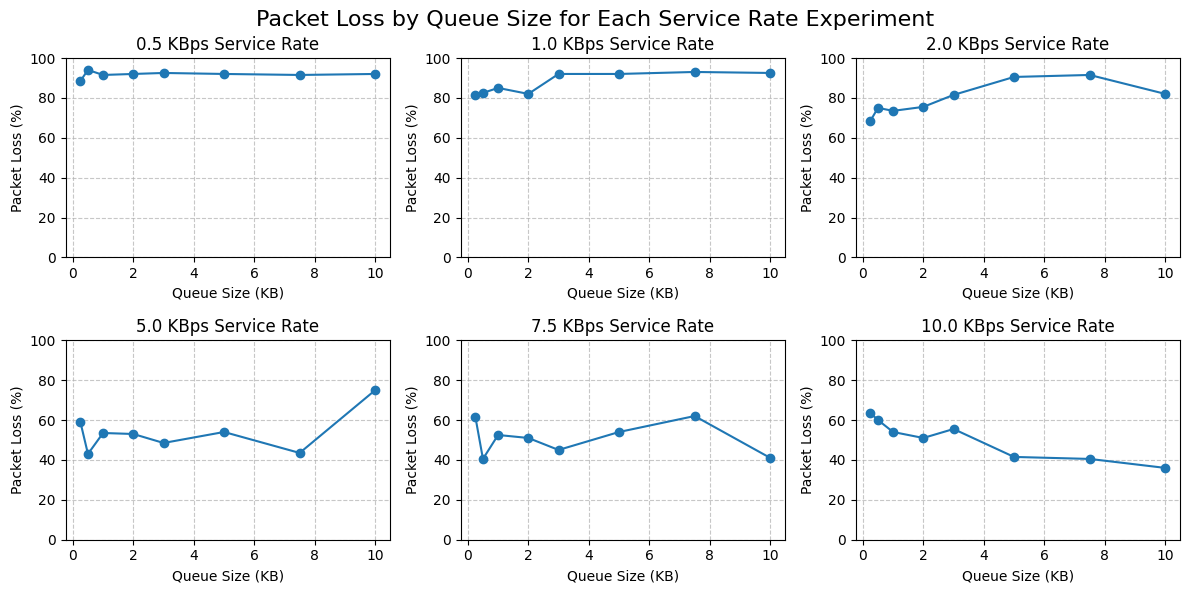

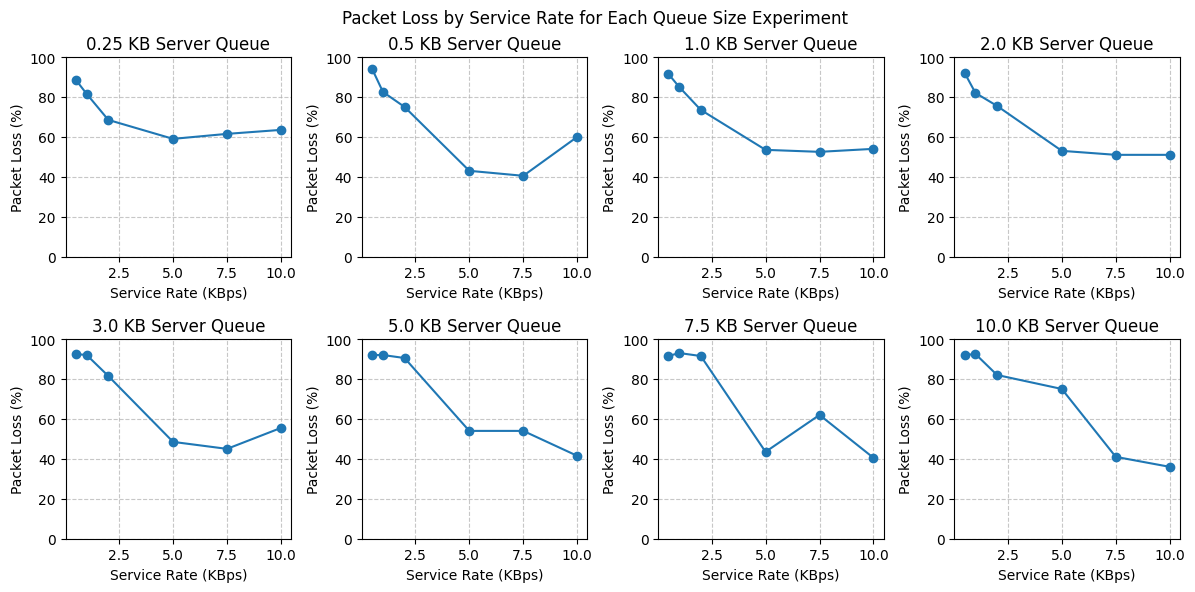

In [16]:
# Print user subplots for all experiments
user_rate_experiment_stats = dict(sorted(user_rate_experiment_stats.items(), key=lambda x: float(x[0])))
user_size_experiment_stats = dict(sorted(user_size_experiment_stats.items(), key=lambda x: float(x[0])))

plot_packet_loss_for_rates(user_rate_experiment_stats)
plot_packet_loss_for_sizes(user_size_experiment_stats)


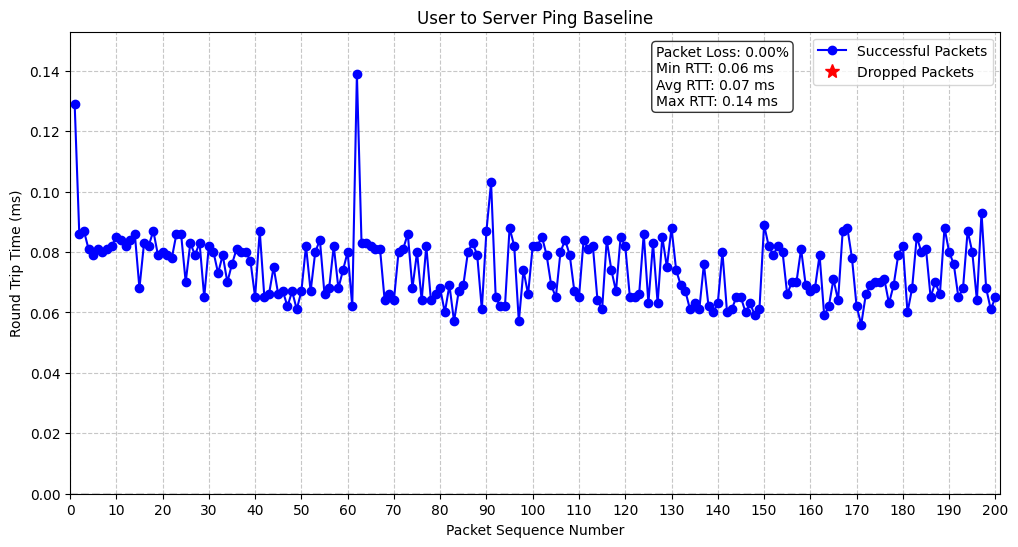

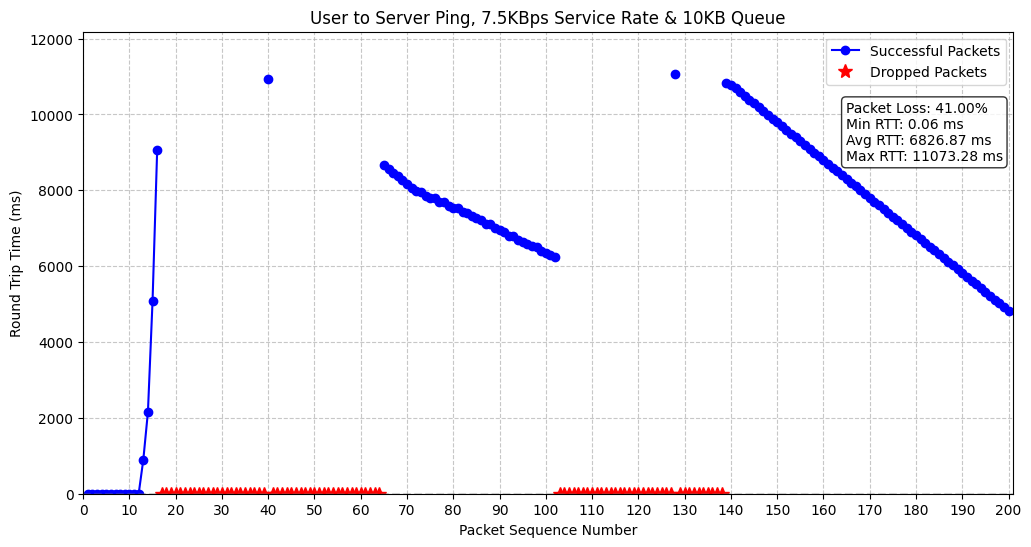

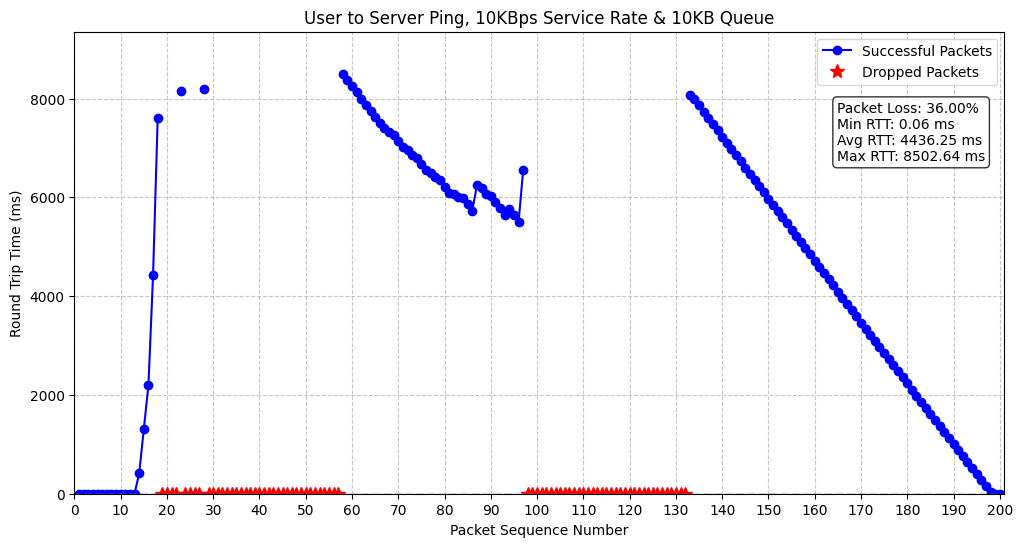

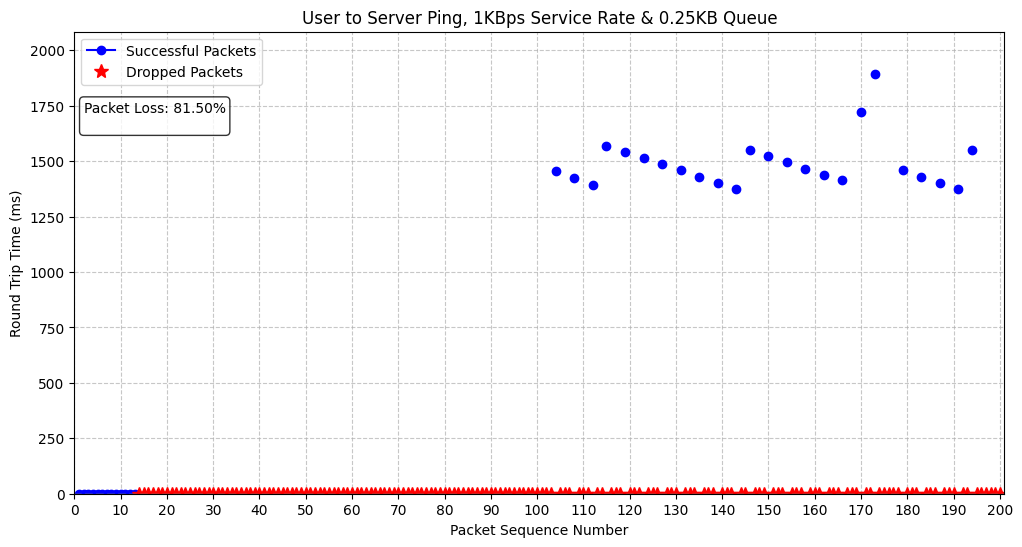

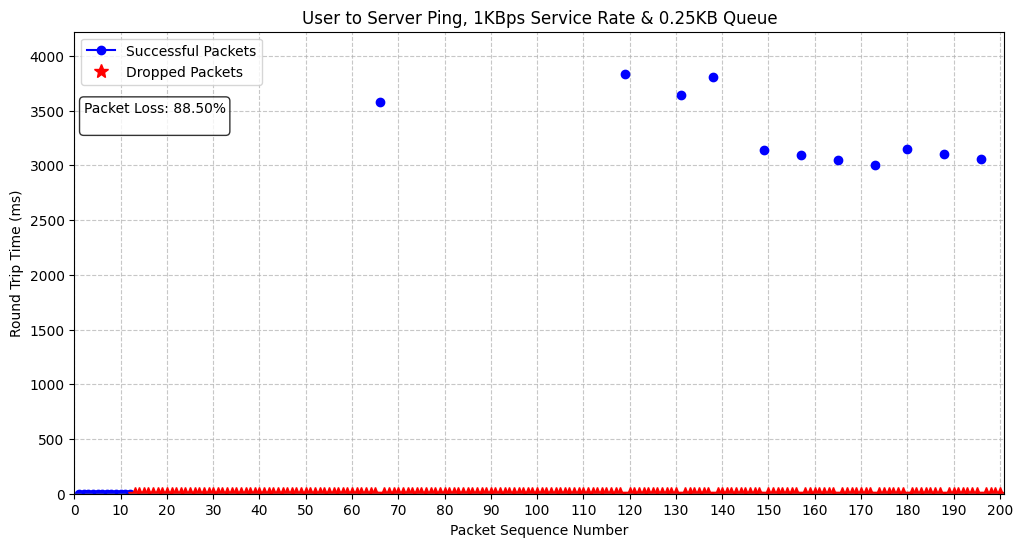

In [17]:
# Print user ping series for a single experiment to show ramp up
plot_ping_data(baseline_info, 'User to Server Ping Baseline', stats_loc=(0.63, 0.97))
plot_ping_data(user_info['User_ping_result_7.5KBps_10.0KB'], 'User to Server Ping, 7.5KBps Service Rate & 10KB Queue')
plot_ping_data(user_info['User_ping_result_10.0KBps_10.0KB'], 'User to Server Ping, 10KBps Service Rate & 10KB Queue')
plot_ping_data(user_info['User_ping_result_1.0KBps_0.25KB'], 'User to Server Ping, 1KBps Service Rate & 0.25KB Queue', legend_loc="upper left", stats_loc=(0.01, 0.85))
plot_ping_data(user_info['User_ping_result_0.5KBps_0.25KB'], 'User to Server Ping, 1KBps Service Rate & 0.25KB Queue', legend_loc="upper left", stats_loc=(0.01, 0.85))


### Display bot ping stats